# Resume Screening App using Machine Learning  
### **Author: Olteanu Rares**

---

## Project Overview  
This project focuses on developing an intelligent **Machine Learning–based Resume Screening Application** that automatically analyzes and scores resumes according to job requirements.  

Using **Natural Language Processing (NLP)** techniques, the system will:  
- Extract relevant information from resumes (skills, experience, education)  
- Match candidate profiles with specific job descriptions  
- Classify and rank resumes based on job fit  
- Help recruiters save time and reduce human bias  

The goal is to build an efficient, reliable, and automated tool that speeds up the recruitment process and improves decision-making.

---



### Step 1: Importing Libraries  

In this step, I imported the main libraries needed for the project:

- **NumPy** – numerical work  
- **Pandas** – data handling  
- **Matplotlib** – data visualizations  
- **Seaborn** – advanced and stylish visualizations  

These tools will help with data processing, analysis, and understanding patterns in the data.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Loading the Dataset  

In this step, I loaded the resume dataset from the file **`UpdatedResumeDataSet.csv`** using Pandas and stored it in a DataFrame called `df`.  

This DataFrame will be used for further analysis, preprocessing, and training the machine learning model.


In [3]:
df=pd.read_csv('UpdatedResumeDataSet.csv')

### Step 3: Previewing the Data  

In this step, I used `df.head()` to display the **first few rows** of the dataset.  

This helps me quickly check:
- If the file was loaded correctly  
- What the **columns** look like  
- How the **data is structured** (e.g., text of resumes, labels, etc.)  

It’s a simple way to get an initial overview of the dataset before starting preprocessing and modeling.


In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Step 4: Checking the Dataset Size  

In this step, I used `df.shape` to see the **size of the dataset**.  

`df.shape` returns two values:
- The **number of rows** → how many resumes are in the dataset  
- The **number of columns** → how many features/fields each resume has  

This helps me understand how much data I have to work with for training the machine learning model.


In [5]:
df.shape

(962, 2)

### Step 5: Checking Category Distribution  

In this step, I used `df['Category'].value_counts()` to see **how many resumes belong to each category**.  

This command counts how often each category (e.g., Data Science, HR, Web Developer, etc.) appears in the **`Category`** column.  

It helps me:
- Understand which categories are **most or least represented**
- Check if the dataset is **balanced or imbalanced**
- Plan how to handle the data during model training.


In [6]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

### Step 6: Visualizing the Category Distribution  

In this step, I created a **bar plot** to visualize how many resumes there are in each category.

- `plt.figure(figsize=(10, 6))` sets the **size** of the plot.  
- `sns.countplot(x='Category', data=df, palette='Set2')` creates a bar chart where each bar shows the **count of resumes per category**.  
- `plt.title`, `plt.xlabel`, and `plt.ylabel` add a clear **title** and **axis labels**.  
- `plt.xticks(rotation=30, ha='right')` rotates the category names on the x-axis so they are easier to read.  
- `plt.show()` displays the final plot.

This visualization helps me quickly see which resume categories are **more frequent** and whether the dataset is **balanced or dominated** by certain categories.


/var/folders/z9/yljky7zj70z5lp2gz0k3bdq00000gn/T/ipykernel_1091/3044510867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Category', data=df, palette='Set2')


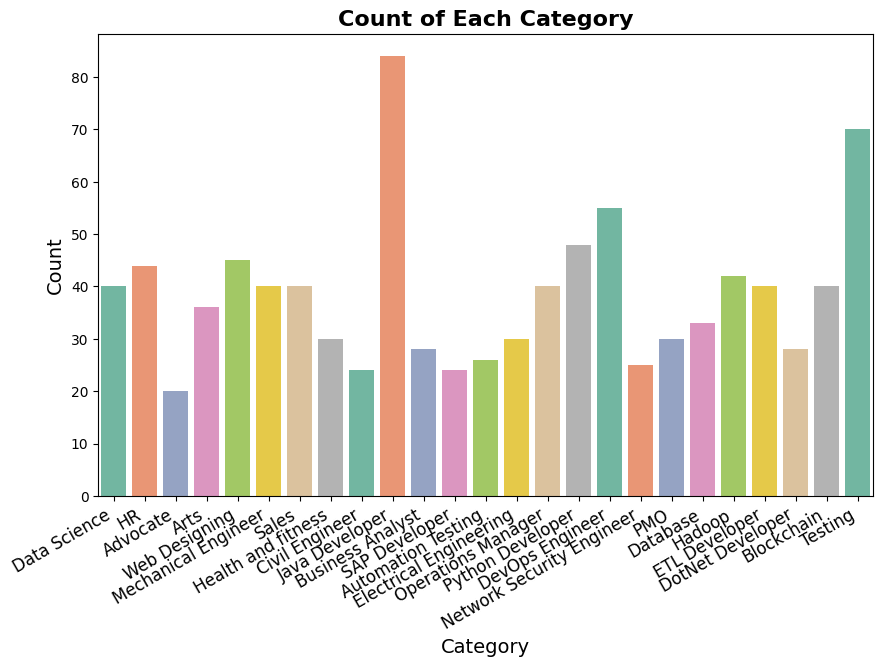

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Category', data=df, palette='Set2')

plt.title('Count of Each Category', fontsize=16, fontweight='bold')
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12) 
plt.show()


### Step 7: Creating a Pie Chart of Category Distribution  

In this step, I created a **pie chart** to show the percentage of resumes in each category.

- `labels = df['Category'].unique()` gets the **list of all unique categories**.  
- `counts = df['Category'].value_counts()` gets how many resumes there are in each category.  
- `plt.figure(figsize=(12, 12))` sets the **size** of the pie chart.  
- `plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0, 1, 3)))` creates the pie chart:
  - `counts` → sizes of the slices  
  - `labels` → names for each slice  
  - `autopct='%1.1f%%'` → shows the **percentage** on each slice  
  - `colors=...` → applies a color map to make the chart visually appealing  

This chart helps me understand the **proportion** of each resume category in the dataset, not just the raw counts.


([<matplotlib.patches.Wedge at 0x12d143cb0>,
 [Text(1.058871227218848, 0.29797940225467084, 'Data Science'),
  Text(0.7841417277955074, 0.7714413462667636, 'HR'),
  Text(0.41347312332933783, 1.0193331036929403, 'Advocate'),
  Text(0.05386230315973435, 1.0986805051052508, 'Arts'),
  Text(-0.27717597647551645, 1.0645062132579801, 'Web Designing'),
  Text(-0.5706079221763859, 0.9404289442321242, 'Mechanical Engineer'),
  Text(-0.8089120194310812, 0.7454269547178518, 'Sales'),
  Text(-0.9773197556910534, 0.5048228353947349, 'Health and fitness'),
  Text(-1.074548194706253, 0.23525768266633296, 'Civil Engineer'),
  Text(-1.0988505276751686, -0.05027442518820011, 'Java Developer'),
  Text(-1.04857738171414, -0.3323935537243749, 'Business Analyst'),
  Text(-0.9271404255154017, -0.5919549234317764, 'SAP Developer'),
  Text(-0.7427816407083777, -0.8113417493427605, 'Automation Testing'),
  Text(-0.5207133706140742, -0.9689466371600296, 'Electrical Engineering'),
  Text(-0.29105721628813813, -1.

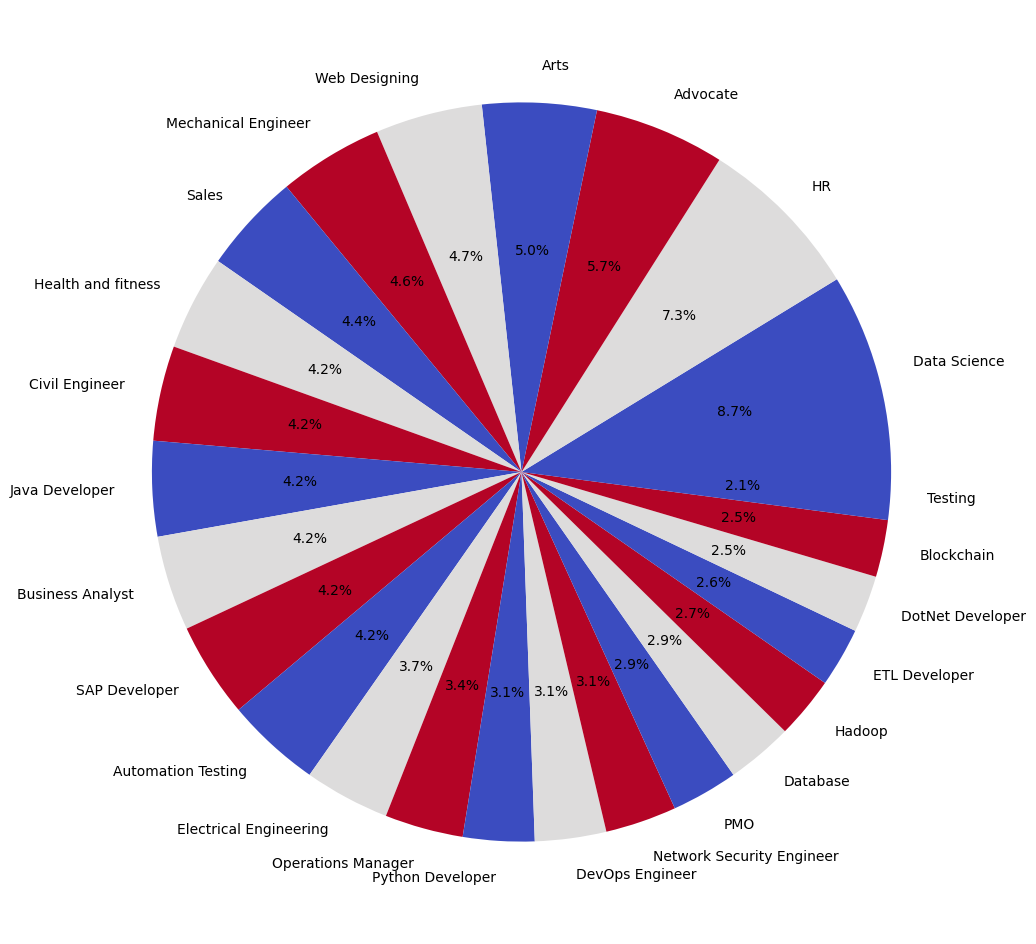

In [8]:
labels = df['Category'].unique()
counts = df['Category'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0,1,3)))

### Step 8: Cleaning the Resume Text  

In this step, I defined a function called `cleanResume(txt)` to **clean and preprocess the raw resume text** using regular expressions (`re` library).

Inside the function:
- `re.sub('http\S+\s*', ' ', txt)` → removes **URLs** from the text.  
- `re.sub('RT|cc', ' ', cleanText)` → removes common **social media terms** like "RT" (retweet) and "cc".  
- `re.sub('#\S+\s*', ' ', cleanText)` → removes **hashtags**.  
- `re.sub('@\S+', ' ', cleanText)` → removes **mentions** (e.g., @username).  
- `re.sub('[%s]' % re.escape("""!#$%&()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', cleanText)` → removes most **punctuation symbols**.  
- `re.sub('[^\w\s-]', ' ', cleanText)` → removes any **remaining special characters** except letters, numbers, spaces, and hyphens.  
- `re.sub('\s+', ' ', cleanText)` → replaces multiple spaces with a **single space**.  

Finally, the function returns the **cleaned text**.  
This cleaning step is very important to prepare the resume content for **NLP processing and machine learning**.


In [9]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s*', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s*', ' ', cleanText)
    cleanText = re.sub('@\S+', ' ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!#$%&()*+,-./:;<=>?@[\\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub('[^\w\s-]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/var/folders/z9/yljky7zj70z5lp2gz0k3bdq00000gn/T/ipykernel_1091/1605728474.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s*', ' ', txt)
/var/folders/z9/yljky7zj70z5lp2gz0k3bdq00000gn/T/ipykernel_1091/1605728474.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s*', ' ', cleanText)
/var/folders/z9/yljky7zj70z5lp2gz0k3bdq00000gn/T/ipykernel_1091/1605728474.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', ' '

### Step 9: Applying the Cleaning Function to All Resumes  

In this step, I applied the `cleanResume()` function to every entry in the **`Resume`** column:

- `df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))`  
  → takes each resume text and **cleans it** using the function defined earlier.  
  → the cleaned text replaces the original text in the `Resume` column.

- `df['Resume'][0]`  
  → displays the **first cleaned resume** so I can check if the preprocessing worked correctly.

This step ensures that all resumes are in a **clean, consistent format** before moving on to feature extraction and model training.


In [10]:
df['Resume']= df['Resume'].apply(lambda x : cleanResume(x))
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM NaÃ ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the

### Step 10: Encoding the Target Labels  

In this step, I converted the text categories into **numerical labels** so they can be used by machine learning models.

- `from sklearn.preprocessing import LabelEncoder`  
  → imports `LabelEncoder`, a tool that converts text labels into numbers.  

- `le = LabelEncoder()`  
  → creates a `LabelEncoder` object.  

- `le.fit(df['Category'])`  
  → learns all the **unique category names** (e.g., Data Science, HR, etc.).  

- `df['Category'] = le.transform(df['Category'])`  
  → replaces each text category with a **numeric code** (0, 1, 2, ...).  

- `df.Category.unique()`  
  → shows the **list of unique numeric labels** used in the dataset.

This step is important because most ML algorithms work with **numbers, not text**, so the categories must be encoded.


In [11]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

### Step 11: Converting Resumes to Numerical Features (TF-IDF)

In this step, I transformed the cleaned resume text into **numerical features** that a machine learning model can understand, using **TF-IDF** (Term Frequency–Inverse Document Frequency).

- `from sklearn.feature_extraction.text import TfidfVectorizer`  
  → imports `TfidfVectorizer`, a tool that converts text into numerical vectors.

- `tfidf = TfidfVectorizer(stop_words='english')`  
  → creates a TF-IDF vectorizer that:
  - removes common **English stop words** (like *the, and, is*), which don’t add much meaning.

- `tfidf.fit(df['Resume'])`  
  → learns the **vocabulary** and TF-IDF weights from all resumes.

- `Required_text = tfidf.transform(df['Resume'])`  
  → transforms each resume into a **sparse numeric vector** based on TF-IDF scores.

This step converts the text resumes into a **matrix of features**, which will be used as input for the machine learning model.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
Required_text = tfidf.transform(df['Resume'])

### Step 12: Splitting the Data into Training and Test Sets  

In this step, I split the data into **training** and **test** sets to evaluate the machine learning model properly.

- `from sklearn.model_selection import train_test_split`  
  → imports the function used to split the data.

- `X_train, X_test, y_train, y_test = train_test_split(Required_text, df['Category'], train_size=0.8, random_state=42)`  
  → splits the data into:
  - `X_train` → 80% of the resume features (TF-IDF vectors) for training  
  - `X_test` → 20% of the resume features for testing  
  - `y_train` → category labels for the training set  
  - `y_test` → category labels for the test set  
  - `random_state=42` ensures the split is **reproducible**.

- The `print` statements show the **shapes** of the training and test sets, confirming how many samples and features are in each.

This step prepares separate data for **training the model** and **evaluating its performance** on unseen resumes.


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(Required_text, df['Category'], train_size=0.8, random_state=42)
print(f'The shapes of the trainings are {X_train.shape} and {y_train.shape}')
print(f'The shapes of the tests are {X_test.shape} and {y_test.shape}')

The shapes of the trainings are (769, 7382) and (769,)
The shapes of the tests are (193, 7382) and (193,)


### Step 13: Training and Evaluating the Machine Learning Model  

In this step, I trained a **K-Nearest Neighbors (KNN)** classifier and evaluated its performance.

- `from sklearn.neighbors import KNeighborsClassifier`  
  → imports the KNN algorithm, which classifies a sample based on the **closest training examples** in the feature space.

- `from sklearn.multiclass import OneVsRestClassifier`  
  → imports a wrapper that allows KNN to handle **multi-class classification** (many categories).

- `from sklearn.metrics import accuracy_score`  
  → imports a function to measure how **accurate** the model is.

- `knn = OneVsRestClassifier(KNeighborsClassifier())`  
  → creates a multi-class KNN model using the **One-vs-Rest** strategy.

- `knn.fit(X_train, y_train)`  
  → trains the model using the **training features** and **labels**.

- `y_pred = knn.predict(X_test)`  
  → predicts the categories for the **test set** resumes.

- `print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')`  
  → calculates and prints the **accuracy score**, showing how many test samples were correctly classified.

This step shows how well the resume screening model performs at predicting the correct **job category** for unseen resumes.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
knn= OneVsRestClassifier(KNeighborsClassifier())
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print(y_pred)
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}')

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]
The accuracy of the model is 0.9844559585492227


### Step 14: Saving the Model and Vectorizer  

In this step, I saved the trained **TF-IDF vectorizer** and the **KNN model** to files so they can be reused later (for example, in a web app) without retraining.

- `import pickle`  
  → imports the `pickle` module, which is used for saving and loading Python objects.

- `with open('tfidf.pkl', 'wb') as f: pickle.dump(tfidf, f)`  
  → saves the trained **TF-IDF vectorizer** into a file named `tfidf.pkl`.

- `with open('clf.pkl', 'wb') as f: pickle.dump(knn, f)`  
  → saves the trained **KNN classifier** into a file named `clf.pkl`.

By saving these objects, I can later:
- Load the **same vectorizer** to transform new resumes.
- Use the **same trained model** to predict categories for new resumes, without training again.


In [15]:
import pickle

with open('tfidf.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

with open('clf.pkl', 'wb') as f:
    pickle.dump(knn, f)


### Step 15: Making Predictions for a New Resume (User Input)

In this step, I built a **simple console-based app** that lets a user paste their resume and get a **predicted job category**.

1. **Cleaning the Input Resume**
   - The `cleanResume(resume_text)` function:
     - Converts the text to **lowercase**.
     - Removes **special characters** (keeps only letters, numbers, and spaces).
     - Replaces multiple spaces with a **single space**.
   - This ensures the new resume is cleaned in a similar way to the training data.

2. **Loading the Saved Model and TF-IDF Vectorizer**
   - `clf = pickle.load(f_clf)` loads the **trained classifier** from `clf.pkl`.
   - `tfidf = pickle.load(f_tfidf)` loads the **trained TF-IDF vectorizer** from `tfidf.pkl`.
   - This allows me to use the model **without retraining**.

3. **Getting the Resume from the User**
   - `myresume = input("Paste your CV/resume as a single line:\n")`
   - The user pastes their resume text into the console.

4. **Transforming the Resume into Features**
   - The resume is cleaned with `cleanResume(myresume)`.
   - `tfidf.transform([cleaned_resume])` converts it into a **TF-IDF feature vector**.

5. **Making a Prediction**
   - `prediction_id = clf.predict(input_features)[0]` gets the **predicted numeric category**.

6. **Mapping the Prediction to a Category Name**
   - `category_mapping` is a dictionary that maps numeric IDs to **readable job categories**  
     (e.g., `6 → "Data Science"`, `20 → "Python Developer"`).
   - `predicted_category = category_mapping.get(prediction_id, "Unknown")`  
     retrieves the **job title** associated with the prediction.

7. **Showing the Result**
   - `print(f"\nPredicted Category: {predicted_category}")`  
     displays the **final predicted job category** for the user's resume.

This step turns the whole project into a **usable ML tool** where a user can paste a resume and immediately see which job category it best fits.


In [18]:
with open('clf.pkl', 'rb') as f_clf:
    clf = pickle.load(f_clf)
with open('tfidf.pkl', 'rb') as f_tfidf:
    tfidf = pickle.load(f_tfidf)

myresume = input("Paste your CV/resume as a single line:\n")

cleaned_resume = cleanResume(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)[0]

category_mapping = {
    0: "Advocate", 1: "Arts", 2: "Automation Testing", 3: "Blockchain", 4: "Business Analyst",
    5: "Civil Engineer", 6: "Data Science", 7: "Database", 8: "DevOps Engineer", 9: "Dotnet Developer",
    10: "ETL Developer", 11: "Electrical Engineering", 12: "HR", 13: "Hadoop", 14: "Health and Fitness",
    15: "Java Developer", 16: "Mechanical Engineer", 18: "Operations Manager", 19: "PMO",
    20: "Python Developer", 21: "Network Security Engineer", 22: "Sales", 23: "Testing", 24: "SAP Developer"
}
print("\nCleaned CV text:\n")
print(cleaned_resume)
predicted_category = category_mapping.get(prediction_id, "Unknown")
print(f"\nPredicted Category: {predicted_category}")



Cleaned CV text:

l in my school there is no one

Predicted Category: PMO
